In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

In [4]:
## read the experimental data noramlized by the maximum dosage value across all the surfaces
df = pd.read_excel('experimental_data/cu_oxidation_per_dosage_fractions.xlsx')
df

,miller_1,miller_2,miller_3,800L,500L,150L,100L,90L,70L,50L,...,Y (mm),h,k,l,x_proj_111,y_proj_111,x_proj_100,y_proj_100,x_proj_110,y_proj_110
0,1,1,1,0.857973,0.877631,0.680456,0.543419,0.497583,0.399100,0.307942,...,0.000,0.5774,0.5774,0.5774,0.000000,0.000000,0.366025,0.366025,-0.317837,0.000000
1,12,11,11,0.779510,0.818269,0.713716,0.549580,0.490472,0.406794,0.350591,...,0.130,0.6055,0.5628,0.5628,0.000000,0.017437,0.350532,0.350532,-0.308186,0.016534
2,15,15,14,0.875255,0.828098,0.772397,0.522783,0.501945,0.413136,0.319737,...,-0.574,0.5912,0.5912,0.5485,0.015102,0.008719,0.371557,0.344721,-0.298743,0.000000
3,11,12,11,0.823829,0.839921,0.793810,0.527182,0.533289,0.423719,0.326068,...,-0.705,0.5628,0.6055,0.5628,0.015100,-0.008718,0.387431,0.360109,-0.308186,-0.016534
4,8,7,7,0.826432,0.825940,0.746685,0.595501,0.574494,0.463721,0.431695,...,0.261,0.6329,0.5475,0.5475,0.000000,0.034906,0.335285,0.335285,-0.298413,0.032914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,56,71,42,0.957259,0.934302,0.900375,0.902621,0.891372,0.862818,0.810474,...,-4.432,0.5647,0.7117,0.4177,0.105099,0.000000,0.454866,0.266963,-0.219554,-0.054636
59,54,72,43,1.000000,0.967646,0.940740,0.763023,0.808161,0.796322,0.776720,...,-4.496,0.5426,0.7216,0.4301,0.104193,-0.013723,0.467765,0.278805,-0.227088,-0.066829
60,52,73,44,0.952911,0.910799,0.900397,0.789154,0.766306,0.707038,0.692199,...,-4.483,0.5208,0.7287,0.4447,0.101519,-0.027201,0.479157,0.292412,-0.236100,-0.078049
61,13,19,12,0.951111,0.968249,0.821974,0.626445,0.709196,0.672733,0.599389,...,-4.393,0.4998,0.7330,0.4614,0.097086,-0.040203,0.488735,0.307643,-0.246512,-0.088100


In [5]:
## denormalize the Miller indices so that we can generate slabs for them
miller_indices = []
for i in tqdm(range(len(df))): 
    norm_miller = np.round(list(df.iloc[i][["h", "k", "l"]].values),2)
    for factor in np.arange(1,100,1):
        miller = np.round(list(factor*norm_miller/np.min(np.abs(norm_miller))),
                           1)
        if (str(miller[0]).split(".")[-1] == "0") & (str(miller[1]).split(".")[-1] == "0") & (str(miller[2]).split(".")[-1] == "0"):
            miller_indices.append(miller)
            break
miller_indices = np.array(miller_indices)
df["miller_1"] = miller_indices[:,0]
df["miller_2"] = miller_indices[:,1]
df["miller_3"] = miller_indices[:,2]

100%|██████████| 63/63 [00:00<00:00, 692.96it/s]


In [6]:
df = df.reindex(columns = ['miller_1', 'miller_2','miller_3', '800L', '500L', '150L', 
       '100L', '90L', '70L', '50L', '30L','30L.1', '20L', '10L', '5L', '3L', '2L', '1L', '1L.1', '0.6L', 'clean',
       'clean.1','800L anneal','800L anneal.1','Position (Pos)', 'X (mm)', 'Y (mm)', 'h', 'k', 'l', 'x_proj_111',
       'y_proj_111','x_proj_100','y_proj_100', 'x_proj_110', 'y_proj_110'])
df

,miller_1,miller_2,miller_3,800L,500L,150L,100L,90L,70L,50L,...,Y (mm),h,k,l,x_proj_111,y_proj_111,x_proj_100,y_proj_100,x_proj_110,y_proj_110
0,1.0,1.0,1.0,0.857973,0.877631,0.680456,0.543419,0.497583,0.399100,0.307942,...,0.000,0.5774,0.5774,0.5774,0.000000,0.000000,0.366025,0.366025,-0.317837,0.000000
1,12.0,11.0,11.0,0.779510,0.818269,0.713716,0.549580,0.490472,0.406794,0.350591,...,0.130,0.6055,0.5628,0.5628,0.000000,0.017437,0.350532,0.350532,-0.308186,0.016534
2,15.0,15.0,14.0,0.875255,0.828098,0.772397,0.522783,0.501945,0.413136,0.319737,...,-0.574,0.5912,0.5912,0.5485,0.015102,0.008719,0.371557,0.344721,-0.298743,0.000000
3,11.0,12.0,11.0,0.823829,0.839921,0.793810,0.527182,0.533289,0.423719,0.326068,...,-0.705,0.5628,0.6055,0.5628,0.015100,-0.008718,0.387431,0.360109,-0.308186,-0.016534
4,8.0,7.0,7.0,0.826432,0.825940,0.746685,0.595501,0.574494,0.463721,0.431695,...,0.261,0.6329,0.5475,0.5475,0.000000,0.034906,0.335285,0.335285,-0.298413,0.032914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,56.0,71.0,42.0,0.957259,0.934302,0.900375,0.902621,0.891372,0.862818,0.810474,...,-4.432,0.5647,0.7117,0.4177,0.105099,0.000000,0.454866,0.266963,-0.219554,-0.054636
59,54.0,72.0,43.0,1.000000,0.967646,0.940740,0.763023,0.808161,0.796322,0.776720,...,-4.496,0.5426,0.7216,0.4301,0.104193,-0.013723,0.467765,0.278805,-0.227088,-0.066829
60,52.0,73.0,44.0,0.952911,0.910799,0.900397,0.789154,0.766306,0.707038,0.692199,...,-4.483,0.5208,0.7287,0.4447,0.101519,-0.027201,0.479157,0.292412,-0.236100,-0.078049
61,13.0,19.0,12.0,0.951111,0.968249,0.821974,0.626445,0.709196,0.672733,0.599389,...,-4.393,0.4998,0.7330,0.4614,0.097086,-0.040203,0.488735,0.307643,-0.246512,-0.088100


In [7]:
# df.to_excel('experimental_data/cu_oxidation_per_dosage_fractions.xlsx', index = False)

In [12]:
df_low_miller = df.query("(0 <= miller_1 <= 6) or (0 <= miller_2 <= 6) or (0 <= miller_3 <= 6)")
df_low_miller

,miller_1,miller_2,miller_3,800L,500L,150L,100L,90L,70L,50L,...,Y (mm),h,k,l,x_proj_111,y_proj_111,x_proj_100,y_proj_100,x_proj_110,y_proj_110
0,1.0,1.0,1.0,0.857973,0.877631,0.680456,0.543419,0.497583,0.399100,0.307942,...,0.000,0.5774,0.5774,0.5774,0.000000,0.000000,0.366025,0.366025,-0.317837,0.000000
11,5.0,4.0,4.0,0.775966,0.834479,0.694082,0.563311,0.524646,0.453606,0.367125,...,0.391,0.6595,0.5315,0.5315,0.000000,0.052401,0.320284,0.320284,-0.288525,0.049133
19,4.0,5.0,4.0,0.843676,0.858431,0.789443,0.559250,0.508175,0.442144,0.436004,...,-2.114,0.5315,0.6595,0.5315,0.045381,-0.026201,0.430634,0.347054,-0.288525,-0.049133
38,3.0,3.0,2.0,0.885916,0.903023,0.953763,0.887768,0.859457,0.860684,0.849090,...,-2.873,0.6395,0.6395,0.4268,0.075773,0.043748,0.390049,0.260317,-0.224109,0.000000
46,3.0,2.0,2.0,0.782802,0.865431,0.731912,0.639613,0.543312,0.523090,0.488475,...,0.782,0.7345,0.4799,0.4799,0.000000,0.105083,0.276671,0.276671,-0.258183,0.096855
62,2.0,3.0,2.0,0.950769,1.000000,0.877151,0.710713,0.641622,0.634796,0.579694,...,-4.228,0.4799,0.7345,0.4799,0.091004,-0.052541,0.496301,0.324268,-0.258183,-0.096855


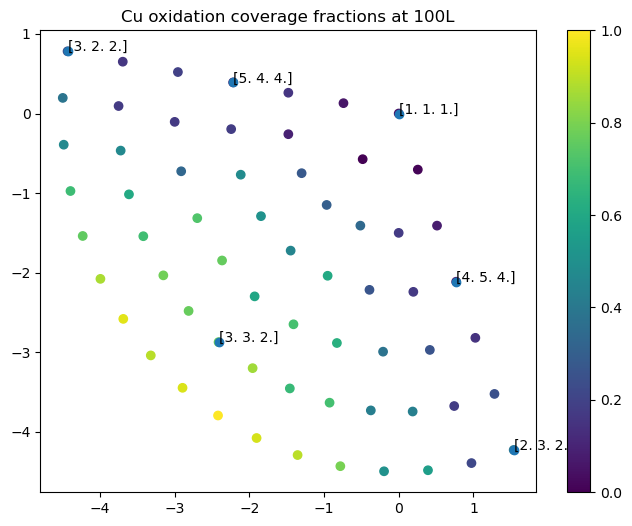

In [13]:
plt.figure(figsize = (8,6))
plt.scatter(df['X (mm)'], df['Y (mm)'], c = df["100L"], cmap = "viridis")
plt.scatter(df_low_miller['X (mm)'], df_low_miller['Y (mm)'])
# annotate the points in this plot with df_low_miller[["miller_1", "miller_2", "miller_3"]].values
for i, txt in enumerate(df_low_miller[["miller_1", "miller_2", "miller_3"]].values):
    plt.annotate(txt, (df_low_miller['X (mm)'].values[i], df_low_miller['Y (mm)'].values[i]))
plt.colorbar()
plt.title("Cu oxidation coverage fractions at 100L");

In [14]:
# raw peak areas representations of coverage
df = pd.read_excel('experimental_data/cu_oxidation_cleaned.xlsx')

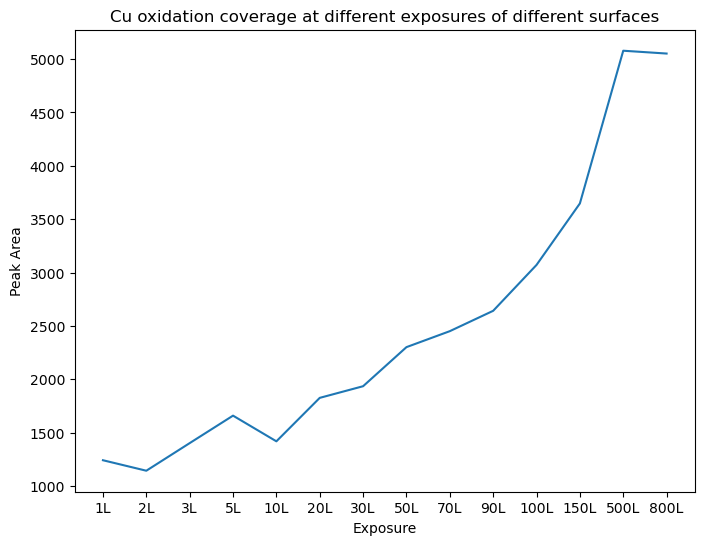

In [18]:
# plot this data for each row with x-axis the dosage ex 30L, 50L, 70L, 90L, 100L and y the coverage fraction
plt.figure(figsize = (8,6))
plt.plot(df.iloc[0][['1L', '2L','3L','5L', '10L', '20L','30L','50L', '70L', '90L', '100L','150L','500L','800L',]].T)
plt.xlabel("Exposure")
plt.ylabel("Peak Area")
plt.title("Cu oxidation coverage at different exposures of different surfaces");

In [ ]:
df[['30L','50L', '70L', '90L', '100L',]]
# plot this data for each row with x-axis the dosage ex 30L, 50L, 70L, 90L, 100L and y the coverage fraction
plt.figure(figsize = (8,6))
plt.plot(df.iloc[0][['30L','50L', '70L', '90L', '100L',]].T)
plt.xlabel("Exposure")
plt.ylabel("Peak Area")
plt.title("Cu oxidation coverage at different exposures of different surfaces");

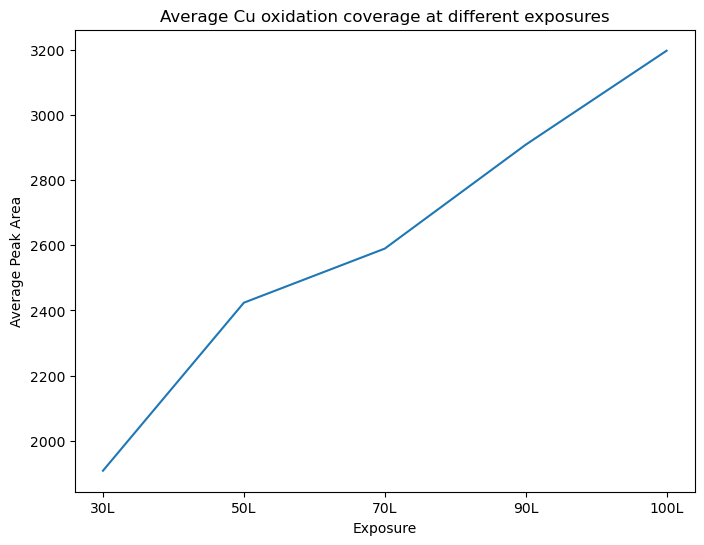

In [204]:
# plot the average coverage at each exposure instead
plt.figure(figsize = (8,6))
plt.plot(df[['30L','50L', '70L', '90L', '100L',]].mean(axis = 0))
plt.xlabel("Exposure")
plt.ylabel("Average Peak Area")
plt.title("Average Cu oxidation coverage at different exposures");

In [46]:
# sort the points by the point number from 1 to 63
# point_num = [int(df.iloc[i]["Position (Pos)"].split("#")[1]) for i in range(len(df))]
# df["point_num"] = point_num
# df.sort_values(by='point_num', inplace=True)

# df_combined = pd.concat([df, df_pos], axis=1)
# df_combined = df_combined.reindex(columns = ['Position (Pos)','point_num', 'X (µm)', 'Y (µm)','h', 'k', 'l', 'x_proj_100', 'y_proj_100',
#        'x_proj_110', 'y_proj_110', 'x_proj_111', 'y_proj_111', '800L', '800L anneal',
#        '800L anneal.1', '500L', '150L', '100L', '90L', '70L', '50L', '30L',
#        '30L.1', '20L', '10L', '5L', '3L', '2L', '1L', '1L.1', '0.6L', 'clean',
#        'clean.1'])
# df_combined
# df.to_excel('experimental_data/cu_oxidation_per_dosage_fractions.xlsx', index = False)